In [1]:
def func1(inp1):
    return inp1 + " func1"

def func2(inp2):
    return inp2 + " func2"

def func3(inp3):
    return inp3 + " func3"

In [2]:
func1("input1")

'input1 func1'

In [15]:
from langgraph.graph import Graph

In [16]:
workflow1 = Graph()

In [17]:
workflow1.add_node("func1", func1)
workflow1.add_node("func2", func2)
# workflow1.add_node("func3", func3)

In [18]:
workflow1.add_edge("func1", "func2")

In [19]:
workflow1.set_entry_point("func1")

In [20]:
workflow1.set_finish_point("func2")

In [21]:
app = workflow1.compile()

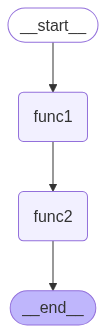

In [22]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
app.invoke("This is Amar")

'This is Amar func1 func2'

In [24]:
for output in app.stream("This is Amar"):
    for key, value in output.items():
        print(f"{key}: {value}")
        print("----")
print("Done")

func1: This is Amar func1
----
func2: This is Amar func1 func2
----
Done


In [25]:
# Excersise: 

from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o", temperature=0.0)

def llm_func(inp):
    response = model.invoke(f"Process this input: {inp}")
    return response.content

def calc_tokens(inp):
    return f"Tokens used: {len(inp.split())}"

workflow2 = Graph()

workflow2.add_node("llm_func", llm_func)
workflow2.add_node("calc_tokens", calc_tokens)

workflow2.add_edge("llm_func", "calc_tokens")

workflow2.set_entry_point("llm_func")
workflow2.set_finish_point("calc_tokens")

app2 = workflow2.compile()

app2.invoke("This is a test input for the LLM function.")

'Tokens used: 40'

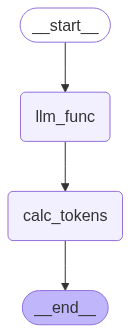

In [26]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [29]:
for output in app2.stream("Tell me Cipla stock in detail."):
    for key, value in output.items():
        print(f"{key}: {value}")
        print("----")
print("Done with LLM workflow")

llm_func: Cipla Limited is a prominent Indian multinational pharmaceutical company, known for its wide range of pharmaceutical products and active pharmaceutical ingredients. Here are some key details about Cipla's stock and company profile:

1. **Stock Information**:
   - **Ticker Symbol**: Cipla is listed on the Bombay Stock Exchange (BSE) and the National Stock Exchange of India (NSE) under the ticker symbol "CIPLA".
   - **Market Capitalization**: Cipla is one of the largest pharmaceutical companies in India, and its market capitalization reflects its significant presence in the industry.
   - **Stock Performance**: The stock performance of Cipla can be influenced by various factors, including company earnings, industry trends, regulatory changes, and broader market conditions.

2. **Company Overview**:
   - **Founded**: Cipla was founded in 1935 by Dr. K.A. Hamied.
   - **Headquarters**: The company is headquartered in Mumbai, India.
   - **Products and Services**: Cipla manufactu